# Pipeline_George


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Read the CSV file with features and target label
input_file = r"E:\Joel\Bioamp_Data\Data\George\Features_Labelled_JG_Rest_Left_10mins.csv" # Replace with the path to your CSV file
data = pd.read_csv(input_file,header=None)

# Split the data into features (X) and target label (y)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define machine learning models
random_forest_model = RandomForestClassifier(random_state=42)
naive_bayes_model = GaussianNB()
svm_model = SVC()

# Create pipelines for each model
random_forest_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', random_forest_model)
])

naive_bayes_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', naive_bayes_model)
])

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', svm_model)
])

# List of pipelines for easy iteration
pipelines = [
    ('Random Forest', random_forest_pipeline),
    ('Naive Bayes', naive_bayes_pipeline),
    ('SVM', svm_pipeline),
    # Add more models as needed
]

# Train and evaluate each model
for model_name, pipeline in pipelines:
    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Print evaluation metrics
    print(f"{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Display the confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


# IMAGE CLASSIFIER


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory containing EEG graph images
data_directory = 'path/to/eeg_graph_images'  # Replace with the path to your EEG graph images
num_classes = 2  # Adjust based on the number of classes (e.g., even and odd)

# Image dimensions
img_width, img_height = 64, 64  # Adjust based on your image size

# Load and preprocess images from subfolders without data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',  # Assumes you have two classes
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the validation set
validation_results = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)

# Make predictions on the validation set
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = validation_generator.classes

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))


# GRAPH PLOTTER in FOlders


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the function to plot EEG signal
def plot_eeg_signal(signal, target, sampling_rate, time_duration, save_folder,c):
    # Create time axis
    time = [i / sampling_rate for i in range(len(signal))]
    
    # Plot EEG signal
    plt.figure(figsize=(10, 5))
    plt.plot(time, signal)
    plt.title(f"EEG Signal for Target: {target}")
    plt.xlabel("Time (s)")
    plt.ylabel("Signal")
    plt.grid(True)
    
    # Save the plot in the specified folder
    plt.savefig(os.path.join(save_folder, f"eeg_signal_{target}_"+str(c)+".png"))
    
    plt.close()

# Define function to process CSV file
def process_csv_file(csv_file, sampling_rate, time_duration,c):
    # Create folders for odd and even rows if they don't exist
    odd_folder = r"E:\Joel\Bioamp_Data\Data\George\2.5_secs_odd_rows_New"
    even_folder = r"E:\Joel\Bioamp_Data\Data\George\2.5_secs_even_rows_New"
    os.makedirs(odd_folder, exist_ok=True)
    os.makedirs(even_folder, exist_ok=True)

    # Read CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Iterate through each row in the DataFrame
    for index, row in df.iterrows():
        signal = row[:-1]  # Exclude the last column (target)
        target = row[-1]   # Target value
        save_folder = odd_folder if index % 2 != 0 else even_folder
        
        # Plot and save EEG signal
        plot_eeg_signal(signal, target, sampling_rate, time_duration, save_folder,c)
        c+=1
# Example usage
csv_file = r"E:\Joel\Bioamp_Data\Data\George\5secs_Labelled_JG_Rest_Left_10mins.csv"
sampling_rate = 10000  # Example sampling rate (samples per second)
time_duration = 2.5   # Example time duration for each plot (seconds)
c=1
process_csv_file(csv_file, sampling_rate, time_duration,c)


In [2]:
import pandas as pd

def replace_value(csv_file, target_value, replacement_value, output_file):
    # Read CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Replace the target value with the replacement value
    df.replace(to_replace=target_value, value=replacement_value, inplace=True)

    # Save the modified DataFrame to a new CSV file
    df.to_csv(output_file, index=False)

# Example usage
csv_file = r"E:\Joel\Bioamp_Data\Data\George\Labelled_JG_Rest_Left_10mins.csv"
target_value = "JAW"
replacement_value = "LEFT"
output_file = r"E:\Joel\Bioamp_Data\Data\George\Updated_Labelled_JG_Rest_Left_10mins.csv"

replace_value(csv_file, target_value, replacement_value, output_file)


In [5]:
import pandas as pd
df=pd.read_csv(r"E:\Joel\Bioamp_Data\Data\George\Updated_Labelled_JG_Rest_Left_10mins.csv",header=None)
df.head(25)

,0,1,2,3,4,5,6,7,8,9,...,24991,24992,24993,24994,24995,24996,24997,24998,24999,25000
0,0,-114,-120,-127,-135,-141,-149,-155,-162,-170,...,89.26,86.25,82.17,79.33,76.24,72.19,68.21,64.29,61.24,REST
1,57,52,48,44,40,36,32,28,24,22,...,-87.00,-90.00,-92.00,-96.00,-99.00,-101.00,-104.00,-106.00,-109.00,LEFT
2,-110,-113,-115,-116,-117,-119,-119,-121,-122,-121,...,1848.00,1847.00,1846.00,1843.00,1841.00,1838.00,1835.00,1830.00,1826.00,REST
3,1822,1817,1811,1805,1799,1793,1786,1779,1770,1763,...,-2737.00,-2726.00,-2716.00,-2705.00,-2695.00,-2685.00,-2675.00,-2665.00,-2656.00,LEFT
4,-2647,-2637,-2628,-2620,-2611,-2603,-2596,-2588,-2583,-2576,...,1088.00,1088.00,1088.00,1087.00,1087.00,1087.00,1087.00,1087.00,1086.00,REST
5,1086,1087,1087,1088,1088,1089,1089,1090,1091,1091,...,-75.00,-79.00,-83.00,-88.00,-91.00,-96.00,-101.00,-104.00,-109.00,LEFT
6,-113,-118,-123,-127,-131,-135,-140,-144,-148,-152,...,3810.00,3804.00,3799.00,3794.00,3788.00,3782.00,3775.00,3769.00,3762.00,REST
7,3754,3747,3740,3731,3723,3714,3704,3695,3685,3674,...,785.00,787.00,791.00,793.00,796.00,799.00,803.00,806.00,810.00,LEFT
8,814,817,822,827,831,835,840,846,851,857,...,-229.00,-227.00,-224.00,-222.00,-219.00,-215.00,-212.00,-208.00,-204.00,REST
9,-199,-194,-190,-184,-179,-173,-166,-160,-153,-147,...,444.00,444.00,443.00,442.00,441.00,440.00,439.00,437.00,437.00,LEFT


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the function to plot EEG signal
def plot_eeg_signal(signal, target, sampling_rate, time_duration, save_folder,c):
    # Create time axis
    time = [i / sampling_rate for i in range(len(signal))]
    
    # Plot EEG signal
    plt.figure(figsize=(10, 5))
    plt.plot(time, signal)
    plt.title(f"EEG Signal for Target: {target}")
    plt.xlabel("Time (s)")
    plt.ylabel("Signal")
    plt.grid(True)
    
    # Save the plot in the specified folder
    plt.savefig(os.path.join(save_folder, f"eeg_signal_{target}"+str(c)+".png"))
    plt.close()

# Define function to process CSV file
def process_csv_file(csv_file, sampling_rate, time_duration,c):
    # Create folders for odd and even rows if they don't exist
    odd_folder = r"E:\Joel\Bioamp_Data\Data\George\updated_2.5_secs_odd_rows"
    even_folder = r"E:\Joel\Bioamp_Data\Data\George\updated_2.5_secs_even_rows"
    os.makedirs(odd_folder, exist_ok=True)
    os.makedirs(even_folder, exist_ok=True)

    # Read CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Iterate through each row in the DataFrame
    for i in range(0, len(df), 4):
        for index, row in df.iloc[i:i+2].iterrows():
            signal = row[:-1]  # Exclude the last column (target)
            target = row[-1]   # Target value
            save_folder = even_folder
            # Plot and save EEG signal
            plot_eeg_signal(signal, target, sampling_rate, time_duration, save_folder,c)
            c+=1
        for index, row in df.iloc[i+2:i+4].iterrows():
            signal = row[:-1]  # Exclude the last column (target)
            target = row[-1]   # Target value
            save_folder = odd_folder
            # Plot and save EEG signal
            plot_eeg_signal(signal, target, sampling_rate, time_duration, save_folder,c)
            c+=1
# Example usage
csv_file = r"E:\Joel\Bioamp_Data\Data\George\2.5secs_Labelled_JG_Rest_Left_10mins.csv"
sampling_rate = 10000  # Example sampling rate (samples per second)
time_duration = 2.5   # Example time duration for each plot (seconds)
c=1
process_csv_file(csv_file, sampling_rate, time_duration,c)


# Updated Classfier

Found 96 images belonging to 2 classes.
Found 23 images belonging to 2 classes.
Epoch 1/10
3/3 [==============================] - 51s 9s/step - loss: 59.9117 - accuracy: 0.5208
Epoch 2/10
3/3 [==============================] - 22s 7s/step - loss: 67.9144 - accuracy: 0.4688
Epoch 3/10
3/3 [==============================] - 23s 7s/step - loss: 13.9996 - accuracy: 0.5521
Epoch 4/10
3/3 [==============================] - 23s 7s/step - loss: 3.9877 - accuracy: 0.6458
Epoch 5/10
3/3 [==============================] - 23s 8s/step - loss: 1.1942 - accuracy: 0.6250
Epoch 6/10
3/3 [==============================] - 24s 8s/step - loss: 0.1164 - accuracy: 0.9583
Epoch 7/10
3/3 [==============================] - 24s 8s/step - loss: 0.0991 - accuracy: 0.9896
Epoch 8/10
3/3 [==============================] - 23s 8s/step - loss: 0.0610 - accuracy: 0.9792
Epoch 9/10
3/3 [==============================] - 23s 7s/step - loss: 0.0687 - accuracy: 0.9792
Epoch 10/10
3/3 [==============================] - 23

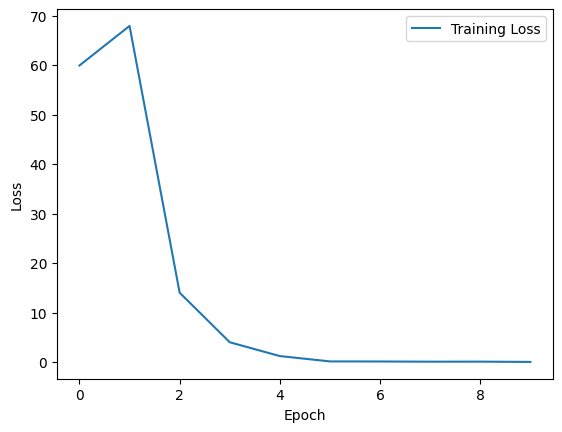

1/1 [==============================] - 1s 1s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.42      0.42        12
           1       0.36      0.36      0.36        11

    accuracy                           0.39        23
   macro avg       0.39      0.39      0.39        23
weighted avg       0.39      0.39      0.39        23

Confusion Matrix:
[[5 7]
 [7 4]]


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory containing EEG graph images
data_directory = "E:\Joel\Bioamp_Data\Data\George\EEGplot" # Replace with the path to your EEG graph images
num_classes = 2  # Adjust based on the number of classes (e.g., even and odd)

# Image dimensions
img_width, img_height = 1000,500  # Adjust based on your image size

# Load and preprocess images from subfolders without data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the validation set
validation_results = model.evaluate(validation_generator)

# Make predictions on the validation set
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = validation_generator.classes

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory containing EEG graph images
data_directory = r"E:\Joel\Bioamp_Data\Data\George\EEGplot"  # Replace with the path to your EEG graph images
num_classes = 2  # Adjust based on the number of classes (e.g., even and odd)

# Image dimensions
img_width, img_height = 1000,500  # Adjust based on your image size

# Load and preprocess images from subfolders without data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Evaluate the model on the validation set
validation_results = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)

# Make predictions on the validation set
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = validation_generator.classes

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Print confusion matrix heatmap
conf_mat = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(num_classes))
plt.yticks(np.arange(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, conf_mat[i, j], ha='center', va='center', color='white')
plt.show()


Found 96 images belonging to 2 classes.
Found 23 images belonging to 2 classes.
Epoch 1/10
3/3 [==============================] - 24s 7s/step - loss: 184.1100 - accuracy: 0.4896
Epoch 2/10
3/3 [==============================] - 22s 7s/step - loss: 18.5386 - accuracy: 0.4167
Epoch 3/10
3/3 [==============================] - 23s 7s/step - loss: 5.9608 - accuracy: 0.4688
Epoch 4/10
3/3 [==============================] - 22s 7s/step - loss: 1.2446 - accuracy: 0.5625
Epoch 5/10
3/3 [==============================] - 22s 7s/step - loss: 0.4780 - accuracy: 0.8229
Epoch 6/10
3/3 [==============================] - 22s 7s/step - loss: 0.3781 - accuracy: 0.7917
Epoch 7/10
3/3 [==============================] - 22s 7s/step - loss: 0.1962 - accuracy: 0.9375
Epoch 8/10
3/3 [==============================] - 22s 7s/step - loss: 0.1301 - accuracy: 0.9583
Epoch 9/10
3/3 [==============================] - 22s 7s/step - loss: 0.0685 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 22

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\generic_utils.py:238: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: cannot convert float infinity to integer

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory containing EEG graph images
data_directory = r"E:\Joel\Bioamp_Data\Data\George\EEGplot"  # Replace with the path to your EEG graph images
num_classes = 2  # Adjust based on the number of classes (e.g., even and odd)

# Image dimensions
img_width, img_height = 1000,500  # Adjust based on your image size

# Load and preprocess images from subfolders without data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
try:
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size
    )

    # Evaluate the model on the validation set
    validation_results = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)

    # Make predictions on the validation set
    y_pred = model.predict(validation_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # True labels
    y_true = validation_generator.classes

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred_classes))

    # Print confusion matrix heatmap
    conf_mat = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_mat, interpolation='nearest', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks(np.arange(num_classes))
    plt.yticks(np.arange(num_classes))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    for i in range(num_classes):
        for j in range(num_classes):
            plt.text(j, i, conf_mat[i, j], ha='center', va='center', color='white')
    plt.show()

except Exception as e:
    print("An error occurred during training and evaluation:", e)


Found 96 images belonging to 2 classes.
Found 23 images belonging to 2 classes.
Epoch 1/10
3/3 [==============================] - 23s 7s/step - loss: 55.9674 - accuracy: 0.5417
Epoch 2/10
3/3 [==============================] - 22s 7s/step - loss: 31.0134 - accuracy: 0.5729
Epoch 3/10
3/3 [==============================] - 22s 7s/step - loss: 16.0767 - accuracy: 0.5104
Epoch 4/10
3/3 [==============================] - 22s 7s/step - loss: 2.2710 - accuracy: 0.8229
Epoch 5/10
3/3 [==============================] - 22s 7s/step - loss: 0.0987 - accuracy: 0.9583
Epoch 6/10
3/3 [==============================] - 22s 7s/step - loss: 0.2283 - accuracy: 0.9688
Epoch 7/10
3/3 [==============================] - 22s 7s/step - loss: 0.0017 - accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - 22s 7s/step - loss: 0.0498 - accuracy: 0.9896
Epoch 9/10
3/3 [==============================] - 21s 7s/step - loss: 0.1532 - accuracy: 0.9583
Epoch 10/10
3/3 [==============================] - 22

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\generic_utils.py:238: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_directory = r"E:\Joel\Bioamp_Data\Data\George\EEGplot"  # Replace with the path to your EEG graph images
num_classes = 2  # Adjust based on the number of classes (e.g., even and odd)

# Image dimensions
img_width, img_height = 1000,500

# Load and preprocess images from subfolders without data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','val_loss'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Calculate accuracy score on validation set
y_true = validation_generator.classes
y_pred = np.argmax(model.predict(validation_generator), axis=-1)
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy Score:", accuracy)


Found 94 images belonging to 2 classes.
Found 23 images belonging to 2 classes.
Epoch 1/10


TypeError: in user code:

    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1085, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1179, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 605, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\metrics_utils.py", line 77, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\metrics\base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\metrics\base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: 'str' object is not callable


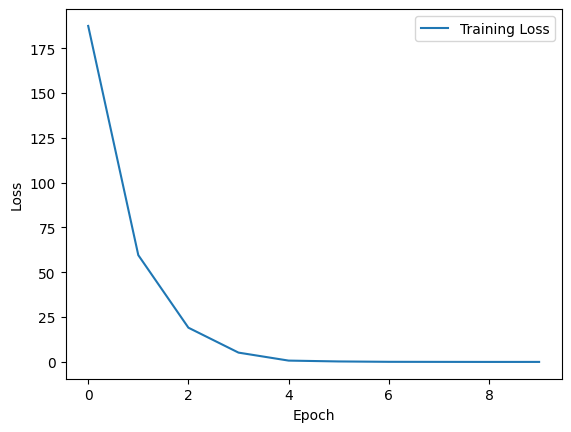

1/1 [==============================] - 1s 1s/step
Accuracy Score: 0.391304347826087


In [2]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Calculate accuracy score on validation set
y_true = validation_generator.classes
y_pred = np.argmax(model.predict(validation_generator), axis=-1)
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy Score:", accuracy)

Found 96 images belonging to 2 classes.
Found 23 images belonging to 2 classes.
Epoch 1/20
3/3 [==============================] - 41s 13s/step - loss: 11.1325 - accuracy: 0.4792
Epoch 2/20
3/3 [==============================] - 38s 12s/step - loss: 1.7569 - accuracy: 0.5312
Epoch 3/20
3/3 [==============================] - 33s 10s/step - loss: 0.9798 - accuracy: 0.4896
Epoch 4/20
3/3 [==============================] - 29s 10s/step - loss: 0.7445 - accuracy: 0.4792
Epoch 5/20
3/3 [==============================] - 29s 9s/step - loss: 0.6916 - accuracy: 0.5312
Epoch 6/20
3/3 [==============================] - 28s 9s/step - loss: 0.6848 - accuracy: 0.7500
Epoch 7/20
3/3 [==============================] - 28s 9s/step - loss: 0.6917 - accuracy: 0.5208
Epoch 8/20
3/3 [==============================] - 27s 9s/step - loss: 0.6814 - accuracy: 0.7708
Epoch 9/20
3/3 [==============================] - 27s 9s/step - loss: 0.6860 - accuracy: 0.4896
Epoch 10/20
3/3 [==============================] - 

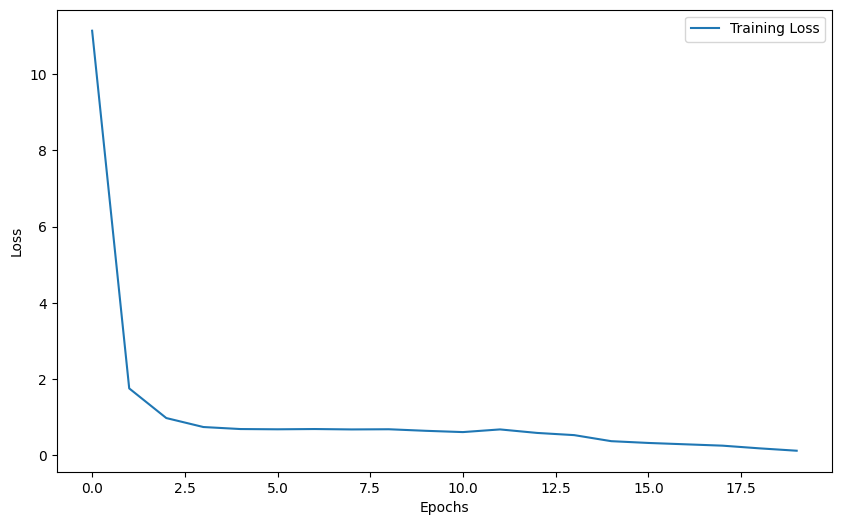

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the directories containing the image data
data_dir = r"E:\Joel\Bioamp_Data\Data\George\EEGplot"

# Define image dimensions and other parameters
img_width, img_height = 1000,500
batch_size = 32
epochs = 20
test_size = 0.2  # 20% of the data will be reserved for testing
num_classes=2
# Use ImageDataGenerator to load images from directories
datagen = ImageDataGenerator(rescale=1./255, validation_split=test_size)

# Load and split the data into training and testing sets
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model on the test set
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False)

true_classes = test_generator.classes
test_generator.reset()
preds = model.predict(test_generator,batch_size=32)
predicted_classes = np.argmax(preds, axis=1)

# Calculate accuracy score
accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy Score:", accuracy)

# Plot training vs validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

        LEFT       0.69      0.71      0.70        35
       RIGHT       0.72      0.70      0.71        37

    accuracy                           0.71        72
   macro avg       0.71      0.71      0.71        72
weighted avg       0.71      0.71      0.71        72



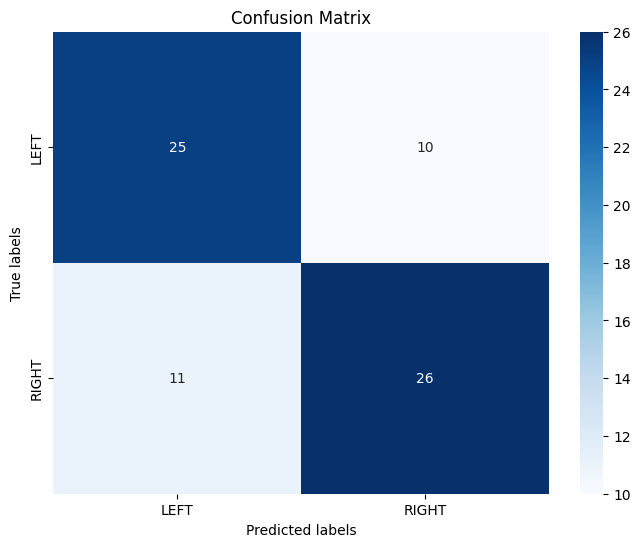

Random Forest model saved to E:\Joel\Bioamp_Data\Models\RF_Features_George.


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Read the CSV file with features and target label
input_file = r"E:\Joel\Bioamp_Data\Data\George\Features_Left_Right.csv"
data = pd.read_csv(input_file)

# Split the data into features (X) and target label (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report (F1-score, recall, precision)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Save the trained Random Forest model to a file using joblib
model_filename = r'E:\Joel\Bioamp_Data\Models\RF_Features_George'
joblib.dump(random_forest_model, model_filename)

print(f"Random Forest model saved to {model_filename}.")
